# Parsing Genesis2 Field data

In [1]:
from genesis import Genesis2, parsers

import numpy as np
import os

In [2]:
# Make some dfl, fld data
G = Genesis2('data/basic/genesis.in')
# Turn on field output
G['idmpfld'] = 1
# Turn on particle output
#G['idmppar'] = 1
G['npart'] = 2048

# Turn on history
#G['ippart'] = 10
G['ipradi'] = 10

G.run()

In [3]:
# These are the files written
!ls {G.path}

genesis.in          genesis.out.dfl     genesis_lattice.in  run
genesis.out         genesis.out.fld     genesis_lattice.out


In [4]:
# Change this
#test_dir = 'path/to/your/output'
test_dir = G.path


out_fname = os.path.join(test_dir,'genesis.out')
dfl_fname = os.path.join(test_dir,'genesis.out.dfl')
fld_fname = os.path.join(test_dir,'genesis.out.fld')

# Get parameters from .out file
odat = parsers.parse_genesis_out(out_fname)
params = odat['param']


my_ncar = params['ncar']
my_dgrid = params['dgrid']

my_nz = 1

In [5]:

my_dfl = parsers.parse_genesis_dfl(dfl_fname, nx=my_ncar)
my_dfl

array([[[ -74.06406378 -41.1522182j ],
        [ -70.69169495 +35.2485532j ],
        [ -34.56735661 +36.64746991j],
        ...,
        [ -99.99222671 +64.3232483j ],
        [-180.44653972 +53.09925555j],
        [-123.59034512 +43.32841857j]],

       [[ -77.64583038 +25.68134794j],
        [ -59.10378581 +75.07862004j],
        [ -40.19541166 +17.38747437j],
        ...,
        [-137.86895776+112.39814644j],
        [-191.09639422+125.43913825j],
        [-166.80208003 +94.81443235j]],

       [[ -40.76724116 +53.02386818j],
        [ -67.79229975 +56.51067843j],
        [ -62.5600458   -5.4709485j ],
        ...,
        [-120.71071331 +36.02497355j],
        [-153.65484851 +46.93304811j],
        [ -88.03670552 +71.78352387j]],

       ...,

       [[ -51.07276226 +34.42936827j],
        [-136.12517482 +55.07515669j],
        [ -91.02017614+108.58759022j],
        ...,
        [ -47.22803284 -11.61034293j],
        [ -35.12138549 +63.21364087j],
        [ -26.36195997 +79.72819

In [6]:
my_fld = parsers.parse_genesis_fld(fld_fname, my_ncar, my_nz)
my_fld[-1]

array([[[ 8.89456540e-25+0.00000000e+00j,
          2.74655617e-25-1.21938798e-26j,
          1.91891710e-25+1.38059784e-25j, ...,
          7.72723934e+01+2.16850325e+01j,
         -2.44469626e+01-5.50954091e+01j,
         -7.31024187e+01+1.18567030e+02j]],

       [[ 1.30023561e-24+0.00000000e+00j,
          6.44034233e-25-3.81664255e-26j,
          4.31421869e-25+2.96739826e-25j, ...,
          4.76686205e+01-3.84748082e+01j,
         -5.92580270e+01-1.17354941e+02j,
         -1.15733481e+02+5.16144268e+01j]],

       [[ 1.89493756e-24+0.00000000e+00j,
          1.12545763e-24+1.32160584e-25j,
          7.18423368e-25+5.51242570e-25j, ...,
          3.24052986e+01-1.52505216e+01j,
         -4.38651049e+01-8.32682685e+01j,
         -6.45919072e+01+1.96376805e+01j]],

       ...,

       [[ 1.89493756e-24+0.00000000e+00j,
          1.12545763e-24+1.32160584e-25j,
          7.18423368e-25+5.51242570e-25j, ...,
          1.61117374e+01-8.06376373e+00j,
         -1.94799456e+01-1.4205038

# Plot

In [7]:
import matplotlib.pyplot as plt

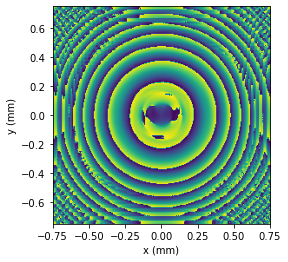

In [8]:
# Field phase at end, slice 0
def plot_field(dat, dgrid):
    ndat = np.angle(dat)
    plt.imshow(ndat, extent = [1000*dgrid*i for i in [-1,1,-1,1]])
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
    plt.show()
plot_field(my_dfl[:, :, 0], my_dgrid )    

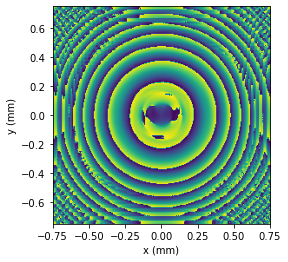

In [9]:
# Field phrase from history file, slice 0
plot_field(my_fld[:, :, 0, -1], my_dgrid ) 